In [1]:
# What to Expect
# MSE: Will be some value > 0 (lower = better).

# R²: Should be between 0 and 1 (closer to 1 = better).

import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load dataset
california = fetch_california_housing(as_frame=True)
df = california.frame  # Convert to pandas DataFrame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# california.data → all the features (inputs)

# california.target → the thing we want to predict (output)

# california.target_names → the name of the target column

print(california.target_names)  # ['MedHouseVal']

['MedHouseVal']


In [3]:
# This is splitting the dataset into inputs (X) and output (y):

# X (features):
# All the columns except MedHouseVal — things like population, number of rooms, median income, etc.

# y (target):
# The MedHouseVal column — the price we want to predict.

# Why do this?
# Machine learning models need to know:
# What data to use for learning (features)
# What data to predict (target)

X = df.drop('MedHouseVal', axis=1)  # Features
y = df['MedHouseVal']               # Target

In [4]:
# What’s happening here?

# train_test_split:
# Divides our dataset into two parts:
# Training set (80%) → The model learns from this.
# Testing set (20%) → The model is evaluated on this (never seen before).

# test_size=0.2:
# 20% of data goes to testing.

# random_state=42:
# A "seed" for random splitting → ensures you get the same split every time (reproducibility).

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on test set
y_pred = lr.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


# 1. Mean Squared Error (MSE)




# 𝑦𝑡𝑟𝑢𝑒 : Actual value (real house price)

# 𝑦pred : Predicted value (model's prediction)

# Square the difference: So that big errors are penalized more.

# Mean: Take the average over all predictions.

# Intuition:
# If MSE = 0 → Perfect predictions.

# Lower MSE = Better model.

# Units are squared, so it's not as interpretable in real-world terms (but good for comparison).

# 2. R-squared (R²)

# Intuition:
# How much variance in the target does the model explain?

# R² = 1 → Perfect model.

# R² = 0 → Model is no better than predicting the average price.

# R² < 0 → Model is worse than a naive guess.

# In plain words:
# MSE: "On average, how wrong are we?"

# R²: "How much better are we than just guessing the average?"

# Rule of thumb for regression models:
# High R² (close to 1): Good fit.

# Low MSE: Good predictions.


# 1. Mean Squared Error (MSE): 0.56
# This means that on average, the squared difference between the predicted and actual house prices is 0.56 (in the target’s units).
# Since the house prices are in $100,000s, this roughly translates to an average squared error of ~$56,000.

# Lower is better — so 0.56 isn’t bad for a simple model.

# 2. R-squared (R²): 0.58
# This means:

# Your model explains 58% of the variance in house prices.

# In other words, 42% of the variability is still unexplained (due to factors the model doesn’t capture).
# For a basic linear regression on this dataset, 0.58 is decent — but we can do better.

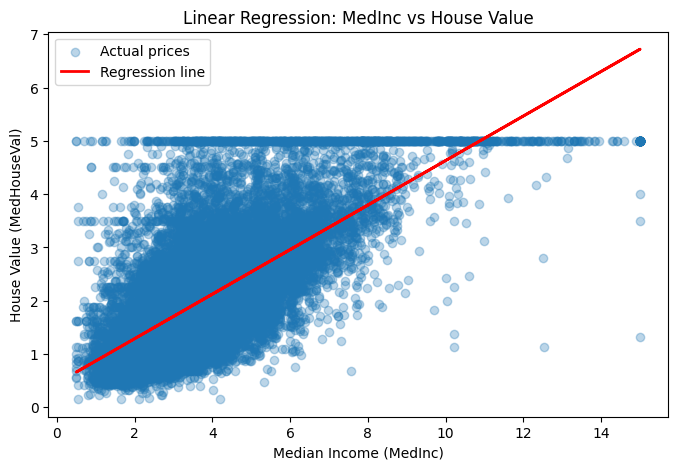

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Choose one feature: MedInc
X_medinc = X[['MedInc']]

# Fit a simple linear regression with only this feature
lr_1d = LinearRegression()
lr_1d.fit(X_medinc, y)

# Predictions
y_pred_1d = lr_1d.predict(X_medinc)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X_medinc, y, alpha=0.3, label="Actual prices")
plt.plot(X_medinc, y_pred_1d, color='red', linewidth=2, label="Regression line")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("House Value (MedHouseVal)")
plt.title("Linear Regression: MedInc vs House Value")
plt.legend()
plt.show()


In [13]:
# Decision Tree (Regression)
# Think of it as a flowchart for making predictions.

# At each node, the tree splits the data based on a condition (e.g., "Is median income > 5?").

# It keeps splitting until it reaches leaf nodes (groups with similar target values).

# For regression, each leaf predicts the average house price of that group.

# Example:

# If MedInc > 5 and AveRooms > 6 → predict price ≈ $350,000.
# Else if MedInc < 2 → predict price ≈ $120,000.

# Pros:

# Captures non-linear relationships (unlike linear regression).

# Easy to interpret (we can visualize the tree).

# Cons:

# Prone to overfitting (it can memorize training data).

from sklearn.tree import DecisionTreeRegressor

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree: MSE={mse_dt:.2f}, R²={r2_dt:.2f}")

Decision Tree: MSE=0.50, R²=0.62


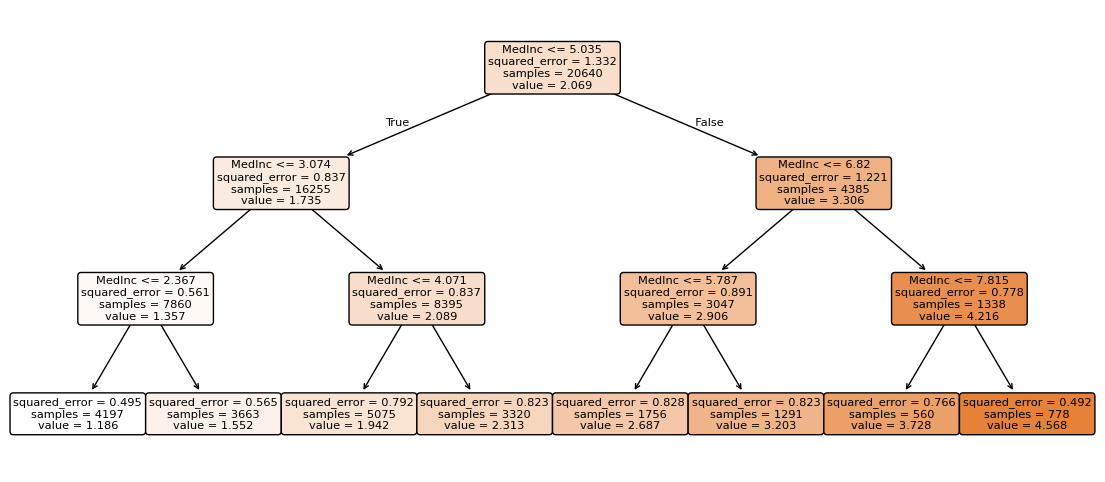

In [15]:
# What will you see?
# The tree starts at the root (top node): e.g., "Is MedInc ≤ 4.04?"

# Each branch splits data based on that condition.

# Leaves (bottom nodes): Predicted house price for that group (average of all houses in that group).

# Example interpretation:

# If MedInc ≤ 2.5 → Predict ≈ $100,000.

# If MedInc > 6.1 → Predict ≈ $400,000.

# It automatically finds thresholds that split the data best.

# It can model non-linear relationships (not just straight lines).

from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Use only one feature for simplicity
X_single = X[['MedInc']]

# Train a small Decision Tree
tree_small = DecisionTreeRegressor(max_depth=3, random_state=42)  # limit depth so it's easy to read
tree_small.fit(X_single, y)

# Plot the tree
plt.figure(figsize=(14,6))
plot_tree(tree_small, feature_names=['MedInc'], filled=True, rounded=True)
plt.show()


In [14]:
# Random Forest
# Now imagine you don’t trust a single tree (it may overfit).

# Random Forest = A bunch of Decision Trees working together:

# Each tree sees a random subset of the data + features.

# They vote (average for regression) on the prediction.

# Pros:

# More robust and accurate than a single tree.

# Handles complex data well.

# Cons:

# Harder to interpret (it’s an ensemble of many trees).

# Slower than a single tree.

from sklearn.ensemble import RandomForestRegressor

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest: MSE={mse_rf:.2f}, R²={r2_rf:.2f}")

Random Forest: MSE=0.26, R²=0.81


In [16]:
# 2. Loop-based (clean & scalable)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append([name, mse, r2])

# Convert to DataFrame for a clean table
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R²"])
print(results_df)


               Model       MSE        R²
0  Linear Regression  0.555892  0.575788
1      Decision Tree  0.495235  0.622076
2      Random Forest  0.255368  0.805123


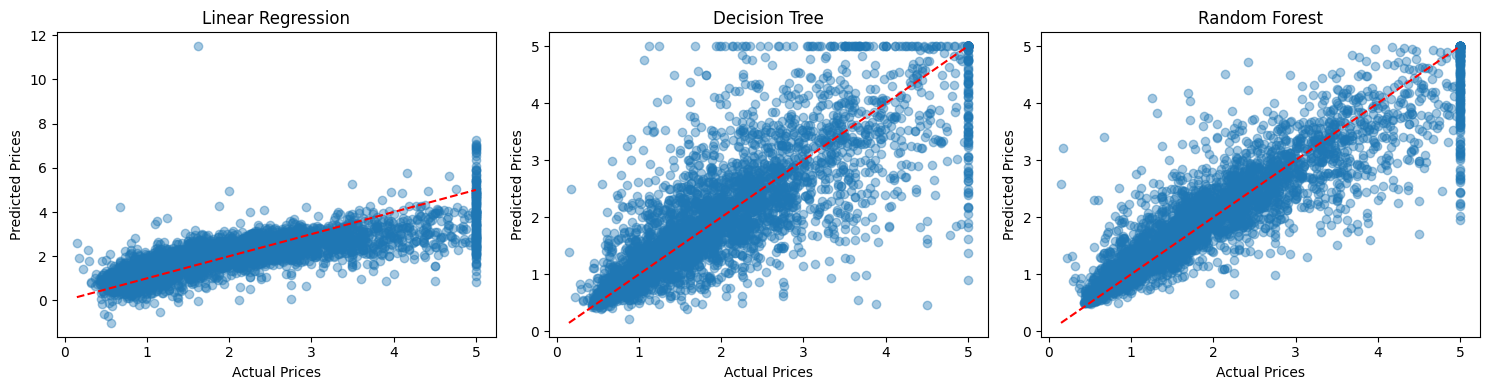

In [17]:
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

plt.figure(figsize=(15,4))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect prediction line
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"{name}")
plt.tight_layout()
plt.show()


# How to read it:

# Dots near the red line: Good predictions.

# Linear Regression: Likely more spread.

# Random Forest: Points will cluster much closer to the red line.

In [ ]:
# Conclusion:

# Random Forest clearly outperformed the other models — reducing prediction error by half and explaining 81% of variance.